In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [316]:
data_1 = pd.read_csv('tmdb_genres.csv')

In [317]:
data_1.head()

,Unnamed: 0,genres
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,16.0,Animation
4,878.0,Science Fiction


In [318]:
data_2 = pd.read_csv('tmdb_movies.csv')

In [319]:
data_2.head()

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0


### Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

In [320]:
most = data_2[['original_title', 'vote_average', 'vote_count']].sort_values('vote_average', ascending=False)

In [321]:
most.head()

,original_title,vote_average,vote_count
3519,Stiff Upper Lips,10.0,1
4247,Me You and Five Bucks,10.0,2
4045,"Dancer, Texas Pop. 81",10.0,1
4662,Little Big Top,10.0,1
3992,Sardaarji,9.5,2


In [322]:
most[most['vote_count'] > most['vote_count'].quantile(q=0.75)].head(10)

,original_title,vote_average,vote_count
1881,The Shawshank Redemption,8.5,8205
3337,The Godfather,8.4,5893
2294,千と千尋の神隠し,8.3,3840
3865,Whiplash,8.3,4254
2731,The Godfather: Part II,8.3,3338
3232,Pulp Fiction,8.3,8428
662,Fight Club,8.3,9413
1818,Schindler's List,8.3,4329
1990,The Empire Strikes Back,8.2,5879
65,The Dark Knight,8.2,12002


### Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi. Przykład wykresu widoczny poniżej:

In [323]:
def date_to_year(row):
    x = str(row['release_date'])[0:4]
    return x

In [324]:
avg = data_2  
avg['release_date'] = avg.apply(lambda row: date_to_year(row), axis=1)
avg = avg.pivot_table(values=('revenue','budget'), index='release_date', aggfunc='mean')
avg.sort_index()

,budget,revenue
release_date,,
1916,3.859070e+05,8.394751e+06
1925,2.450000e+05,2.200000e+07
1927,9.262000e+07,6.504220e+05
1929,1.895000e+05,2.179000e+06
1930,3.950000e+06,8.000000e+06
...,...,...
2014,3.095989e+07,1.013466e+08
2015,3.113216e+07,1.054399e+08
2016,4.570327e+07,1.390496e+08


In [325]:
years = []
for n in range(2010,2017):
    years.append(str(n))
avg = avg.loc[years]

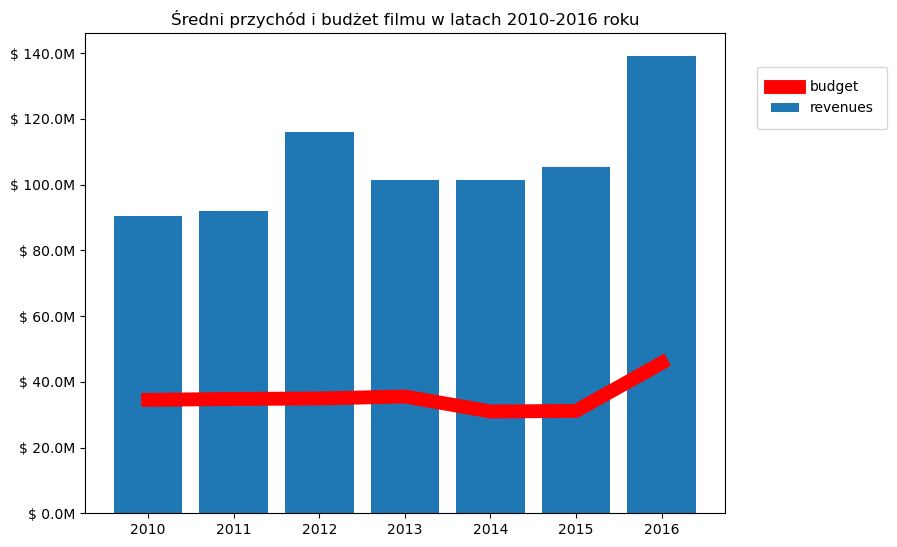

In [409]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
revenue = avg['revenue']
budget = avg['budget']

def million(x, pos):
    return '$ {:2.1f}M'.format(x*1e-6)
formatter = plt.FuncFormatter(million)
axes.yaxis.set_major_formatter(formatter)
axes.bar(years, revenue, label='revenues')
axes.plot(years, budget, color='red', linewidth=10, label='budget')
axes.set_title('Średni przychód i budżet filmu w latach 2010-2016 roku')
axes.legend(loc=(1.05,0.8), markerscale=0.1, borderpad=1)

### Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

In [330]:
data_joined = data_2.join(data_1.set_index('Unnamed: 0'), on='genre_id')

In [332]:
data_joined.head()

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,Action
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0,Adventure
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,Action
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,Action
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,Action


### Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

In [338]:
most_genres = data_joined[['genres', 'id']].groupby(by='genres', as_index=False).count()

In [340]:
most_genres[most_genres['id'] == most_genres['id'].max()]

,genres,id
6,Drama,1207


### Filmy, którego gatunku trwają średnio najdłużej (runtime)?

In [341]:
avg_runtime = data_joined[['genres', 'runtime']].groupby(by='genres', as_index=False).mean()

In [342]:
avg_runtime[avg_runtime['runtime'] == avg_runtime['runtime'].max()]

,genres,runtime
10,History,133.96


### Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

In [358]:
x = data_joined[data_joined['genres'] == 'History']
x.head()

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
110,110,140000000,NaN,676,en,Pearl Harbor,The lifelong friendship between Rafe McCawley ...,34.206690,2001,449220945,183.0,Released,It takes a moment to change history. It takes ...,Pearl Harbor,6.6,1791,36.0,History
280,280,80000000,http://www.publicenemies.net/,11322,en,Public Enemies,Depression-era bank robber John Dillinger's ch...,33.691694,2009,214104620,140.0,Released,America's Most Wanted.,Public Enemies,6.5,1344,36.0,History
633,633,65000000,NaN,72976,en,Lincoln,A revealing drama that focuses on the 16th Pre...,36.307296,2012,275293450,149.0,Released,With the moral courage and fierce determinatio...,Lincoln,6.7,1429,36.0,History
839,839,55000000,http://en.wikipedia.org/wiki/Evita_(film),8818,en,Evita,The hit musical based on the life of Evita Dua...,7.027139,1996,141047179,134.0,Released,The Most Anticipated Motion Picture Event of T...,Evita,5.9,120,36.0,History
1091,1091,44000000,NaN,10858,en,Nixon,An all-star cast powers this epic look at Amer...,3.770161,1995,13681765,192.0,Released,"Triumphant in Victory, Bitter in Defeat. He Ch...",Nixon,7.1,71,36.0,History


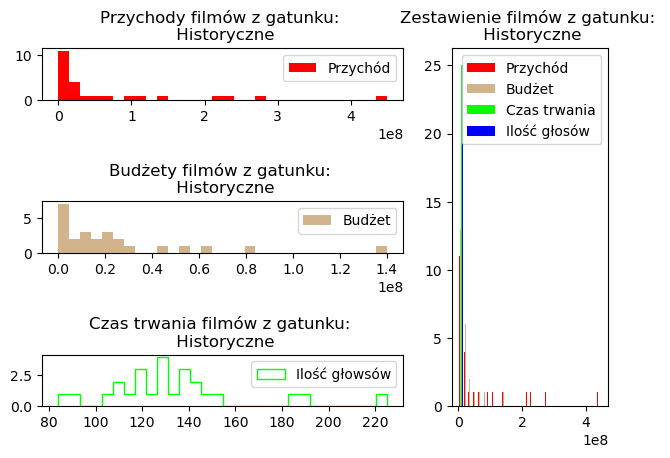

In [451]:
y = x['revenue']
w = x['budget']
e = x['runtime']
d = x['vote_count']
z = x[['revenue', 'budget', 'runtime', 'vote_count']]


n_bins = 30
plt.close('all')
fig = plt.figure()
ax0 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax1 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax2 = plt.subplot2grid((3, 3), (2, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (0, 2), rowspan=3)



colors = ['red', 'tan', 'lime', 'blue']
label = ['Przychód', 'Budżet', 'Czas trwania', 'Ilość głosów']

ax0.hist(y, n_bins, histtype='bar', color='red', label='Przychód')
ax0.legend(prop={'size': 10})
ax0.set_title('Przychody filmów z gatunku: \n Historyczne')

ax1.hist(w, n_bins, histtype='bar', stacked=True, color='tan', label='Budżet')
ax1.legend(prop={'size': 10})
ax1.set_title('Budżety filmów z gatunku: \n Historyczne')

ax2.hist(e, n_bins, histtype='step', stacked=True, fill=False, color='lime', label='Ilość głowsów')
ax2.legend(prop={'size': 10})
ax2.set_title('Czas trwania filmów z gatunku: \n Historyczne')

ax3.hist(z, n_bins, histtype='bar', color=colors, label=label)
ax3.legend(prop={'size': 10})
ax3.set_title('Zestawienie filmów z gatunku: \n Historyczne')

fig.tight_layout(pad=1.5, w_pad=1.5, h_pad=1.5)
plt.show()